### This is a first exploration on predicting turnover from sales time series data
#### Julien Hernandez Lallement, julien.hernandez-lallement@orsay.com
#### 12-02-2020

In [27]:
# Import libraries and fix settings
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8] 

In [6]:
# path where file is located
path = '/home/julien/Documents/Projects/datasets/sales_iuliia'

In [7]:
os.chdir(path)

In [8]:
os.listdir()

['CustomerServiceFrc.csv']

In [68]:
df=pd.read_csv('CustomerServiceFrc.csv',
               delimiter=';',
               header=0)

In [18]:
df.dtypes

Year         int64
Woche        int64
orders     float64
tickets    float64
dtype: object

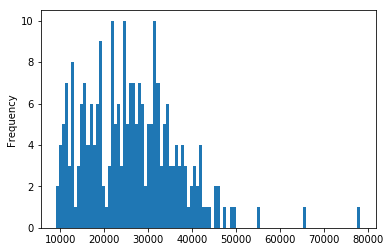

In [17]:
df.orders.plot(kind='hist', bins= 100)

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


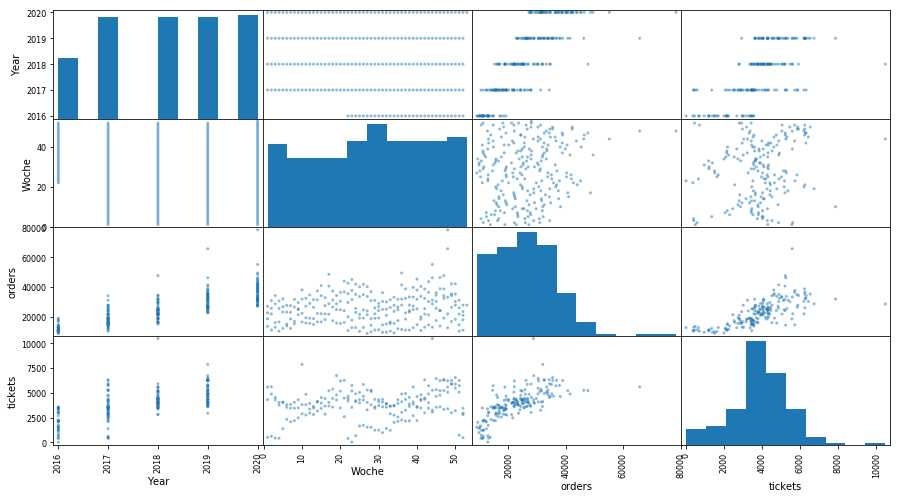

In [28]:
pd.scatter_matrix(df);

<div class="alert alert-block alert-info">
<b>Intermediate commentary:</b> <br> 
Seems to be an hyperbolic relation between tickets and orders <br>
I suppose order represent the turnover, or whatever monetary KPI, and tickets is the number of orders? <br>
Note the increasing number of orders over the years <br>
Good thing is that data follows a gaussian distr., so that makes life easier
</div>


In [96]:
df.corr(method='pearson') # parametric corr test

,year,calendar_week,money,number_of_orders
year,1.000000,-0.138556,0.795259,0.639249
calendar_week,-0.138556,1.000000,0.167422,0.213294
money,0.795259,0.167422,1.000000,0.708878
number_of_orders,0.639249,0.213294,0.708878,1.000000


In [69]:
df = df.rename(columns={'orders' : 'money',
                        'tickets': 'number_of_orders',
                        'Woche': 'calendar_week'})
df.columns = [c.lower() for c in df.columns]

In [70]:
df.sample(5)

,year,calendar_week,money,number_of_orders
225,2020,39,39788.45,NaN
50,2017,20,15597.00,3470.0
77,2017,47,34197.00,6322.0
163,2019,29,26060.00,4331.0
157,2019,23,37744.00,5736.0


In [61]:
# Show me missing values
def show_NAs(dataf):
    return pd.concat([dataf.isnull().sum()],axis=1, keys=['NAs'])

In [62]:
show_NAs(df)

,NAs
year,0
calendar_week,0
money,0
order_number,53


In [57]:
df.loc[df.order_number.isnull()]

,year,calendar_week,money,order_number
187,2020,1,27126.50,NaN
188,2020,2,30917.10,NaN
189,2020,3,34334.90,NaN
190,2020,4,30742.75,NaN
191,2020,5,32065.25,NaN
192,2020,6,27756.50,NaN
193,2020,7,27574.10,NaN
194,2020,8,31785.70,NaN
195,2020,9,29626.40,NaN
196,2020,10,38109.50,NaN


In [65]:
df.duplicated().sum()

0

<div class="alert alert-block alert-info">
<b>Intermediate commentary:</b> <br> 
For some reason the number of orders are missing for year 2020 <br>
Althoug no duplicate row, there is some strange entries, like week 53 of year 2020 <br>
But whatever, Im going quick & dirty
</div>


In [71]:
import plotnine as p9

/home/julien/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 53 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


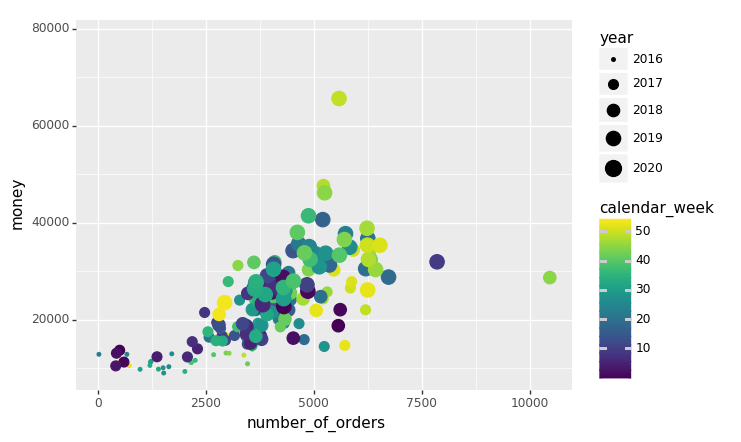

<ggplot: (8774152648861)>

In [78]:
(p9.ggplot()+
p9.geom_point(data = df,
              mapping=(p9.aes(x='number_of_orders',
                              y='money',
                              color='calendar_week',
                              size='year'))
             ))

<div class="alert alert-block alert-info">
<b>Intermediate commentary:</b> <br> 
Seems indeed quite linear, although maybe exponential to some extend...But Iuliia might be on the right track with her current model <br>
 </div>

/home/julien/anaconda3/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/julien/anaconda3/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/julien/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


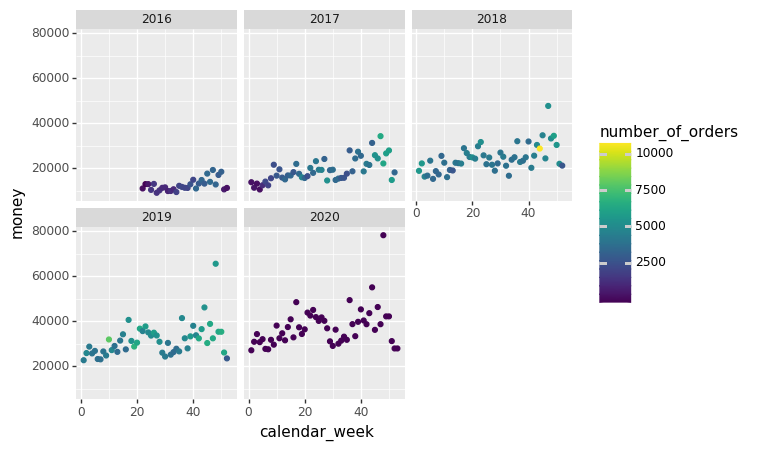

<ggplot: (8774149356177)>

In [210]:
(p9.ggplot()+
p9.geom_point(data = df,
              mapping=(p9.aes(x='calendar_week',
                              y='money',
                              color='number_of_orders',
                              #size='year'
                             )))
+p9.facet_wrap(['year'])
             )

<div class="alert alert-block alert-warning">
<b>Intermediate commentary:</b> <br> 
Thing is, seems the data's behavior is not constant over the years (#orders in y)...Caution in what data you use to train <br>
Since we have only one feature to use for prediction, we dont have to worry about colinearity, but more features would probably help. **See with Iuliia**
 </div>

Anyway, lets get started with some modelling, we will get back later to feature engineering

Ill start with the Linear Regression that Iuliia is using

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [201]:
# Since the data looks quite different across years, Im excluding early years for now. Too bad cause we have little data
df_ml = df.copy().dropna().loc[~(df.year == 2017)]
y = df_ml.money.values
X = df_ml.drop(columns={'money'}).values

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
X = scaler.transform(X)

<div class="alert alert-block alert-danger">
<b>Intermediate commentary:</b> <br> 
I am not sure about this step since some of the variables are time series... <br>
 </div> 

In [203]:
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [204]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [197]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [198]:
from sklearn.metrics import r2_score, mean_absolute_error
from numpy import sqrt

In [199]:
rmse = (np.sqrt(mean_absolute_error(y_train, lr.predict(X_train))))
r2 = r2_score(y_train, lr.predict(X_train))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE = residuals is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE = residuals is 61.21660849602746
R2 score is 0.6601168966380542




In [200]:
rmse = (np.sqrt(mean_absolute_error(y_test, lr.predict(X_test))))
r2 = r2_score(y_test, lr.predict(X_test))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE = residuals is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE = residuals is 49.79726331703511
R2 score is 0.8630512666692858




<div class="alert alert-block alert-success">
<b>Intermediate commentary:</b> <br> 
Not too shabby indeed :) <br>
But let's see how other models perform
 </div>

In [179]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.model_selection import cross_val_score, KFold

In [206]:
# Since the data looks quite different across years, Im excluding early years for now. Too bad cause we have little data
df_ml = df.copy().dropna().loc[~(df.year == 2017)]
y = df_ml.money.values
X = df_ml.drop(columns={'money'}).values

In [207]:
y = df_ml.money
X = df_ml.drop(columns={'money'})

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
X = scaler.transform(X)

/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [208]:
model = {}
model['LinearRegression'] = LinearRegression()
model['LassoRegression'] = Lasso()
model['RidgeRegression'] = Ridge()
model['RandomForest'] = RandomForestRegressor(n_estimators=100)
model['AdaBoost'] = AdaBoostRegressor()
model['ExtraTrees'] = ExtraTreesRegressor(n_estimators=100)
model['DecisionTree'] = DecisionTreeRegressor()
model['ExtraTree'] = ExtraTreeRegressor()

model_results = []
model_names = []

seed = 42
folds=10

for iModel in model:
    curr_model = model[iModel]
    kfolds = KFold(n_splits=folds, shuffle=False, random_state=seed) # see later whether shuffling might help
    results = cross_val_score(curr_model, 
                              X=X, 
                              y=y, 
                              scoring=None, 
                              cv=kfolds, 
                              n_jobs=None, 
                              verbose=0, 
                              fit_params=None, 
                              pre_dispatch='2*n_jobs', 
                              )
    model_results.append(results)
    model_names.append(curr_model)
    print("{}: {}, {}".format(curr_model, round(results.mean(), 3), round(results.std(), 3)))
    
    


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): -0.756, 2.0
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False): -0.755, 1.995
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001): -0.715, 1.868
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False): -0.548, 0.899
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None): -1.911, 2.924
ExtraTreesRe

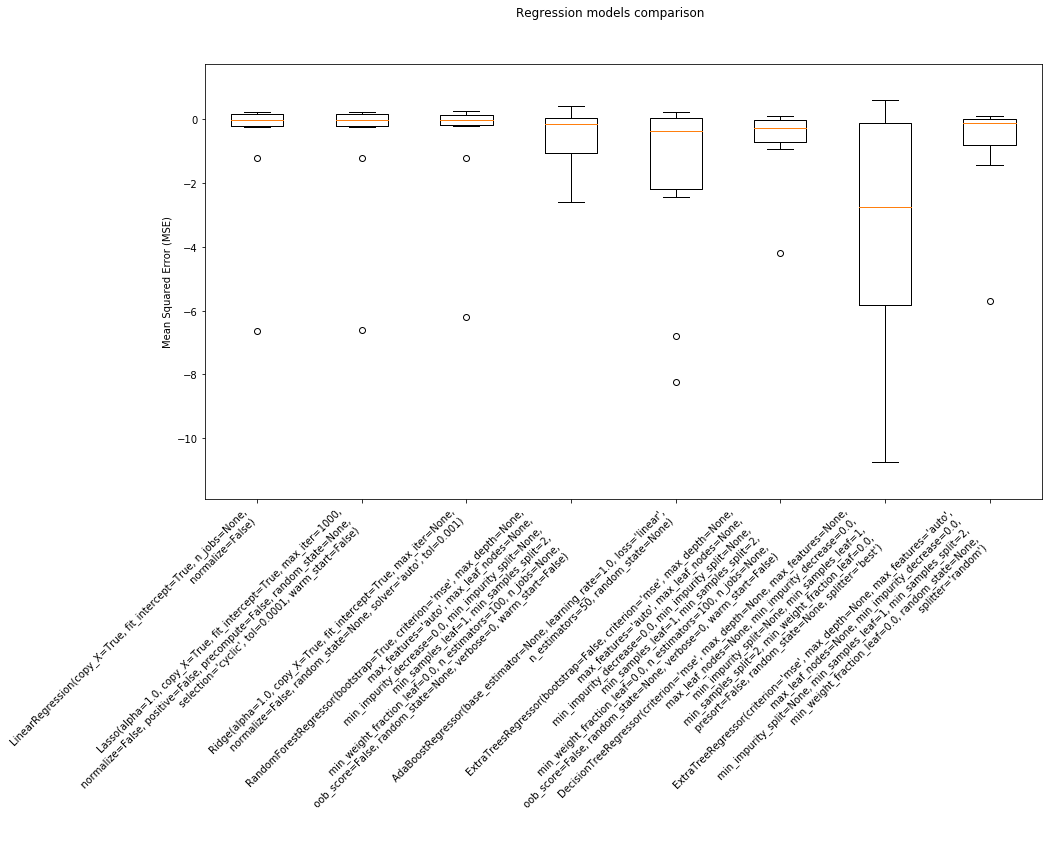

In [209]:
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
#plt.savefig("model_mse_scores.png")
#plt.clf()
plt.show()